In [2]:
import numpy as np
import pandas as pd
loan_data = pd.read_csv(r"C:\Users\91812\Desktop\LendingClubCaseStudy\loan.csv",low_memory=False)

In [8]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [5]:
missing_percent = loan_data.isnull().mean().sort_values(ascending=False) * 100
missing_percent

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [10]:
loan_data.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [23]:
# Define the relevant and optional columns for analysis
columns_for_analysis = [
    'loan_amnt',
    'term',
    'int_rate',
    'installment',
    'grade',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'open_acc',
    'pub_rec',
    'loan_status',  # Target variable
    'home_ownership',
    'emp_length',
    'purpose',
    'verification_status',
    'inq_last_6mths'
]

# Create a new DataFrame with the selected columns
loan_data_analysis = loan_data[columns_for_analysis]

# Display the first few rows of the new DataFrame
loan_data_analysis.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,loan_status,home_ownership,emp_length,purpose,verification_status,inq_last_6mths
0,5000,36 months,10.65%,162.87,B,24000.0,27.65,0,3,0,Fully Paid,RENT,10+ years,credit_card,Verified,1
1,2500,60 months,15.27%,59.83,C,30000.0,1.00,0,3,0,Charged Off,RENT,< 1 year,car,Source Verified,5
2,2400,36 months,15.96%,84.33,C,12252.0,8.72,0,2,0,Fully Paid,RENT,10+ years,small_business,Not Verified,2
3,10000,36 months,13.49%,339.31,C,49200.0,20.00,0,10,0,Fully Paid,RENT,10+ years,other,Source Verified,1
4,3000,60 months,12.69%,67.79,B,80000.0,17.94,0,15,0,Current,RENT,1 year,other,Source Verified,0


In [16]:
loan_data_analysis.shape

(39717, 15)

In [28]:
# Check for missing values in the new DataFrame
missing_values = loan_data_analysis.isnull().sum().sort_values(ascending=False)
print(missing_values)

emp_length             1075
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
annual_inc                0
dti                       0
delinq_2yrs               0
open_acc                  0
pub_rec                   0
loan_status               0
home_ownership            0
purpose                   0
verification_status       0
inq_last_6mths            0
dtype: int64


In [34]:
loan_data_analysis['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [35]:
# Impute missing values in emp_length with 'Unknown'
loan_data_analysis['emp_length'].fillna('Unknown', inplace=True)

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\852898641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_analysis['emp_length'].fillna('Unknown', inplace=True)


In [36]:
# Check for missing values again after filling na values in the DataFrame
missing_values = loan_data_analysis.isnull().sum().sort_values(ascending=False)
print(missing_values)

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
annual_inc             0
dti                    0
delinq_2yrs            0
open_acc               0
pub_rec                0
loan_status            0
home_ownership         0
emp_length             0
purpose                0
verification_status    0
inq_last_6mths         0
dtype: int64


In [57]:
Q1 = loan_data_analysis['loan_amnt'].quantile(0.25)
Q3 = loan_data_analysis['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Cap the values in 'loan_amnt' to the upper bound
loan_data_analysis['loan_amnt'] = loan_data_analysis['loan_amnt'].apply(lambda x: min(x, upper_bound))

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\129027971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_analysis['loan_amnt'] = loan_data_analysis['loan_amnt'].apply(lambda x: min(x, upper_bound))


In [63]:
loan_data_analysis['delinq_2yrs'].describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [64]:
# Set the threshold for capping
delinq_threshold = 3  # Cap at 3

# Cap the values in 'delinq_2yrs'
loan_data_analysis['delinq_2yrs'] = loan_data_analysis['delinq_2yrs'].clip(upper=delinq_threshold)

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\1285930626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_analysis['delinq_2yrs'] = loan_data_analysis['delinq_2yrs'].clip(upper=delinq_threshold)


In [78]:
loan_data_analysis['int_rate'].value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [79]:
# Convert 'int_rate' from percentage string to float
loan_data_analysis['int_rate'] = loan_data_analysis['int_rate'].str.rstrip('%').astype(float) / 100

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\1988229081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_analysis['int_rate'] = loan_data_analysis['int_rate'].str.rstrip('%').astype(float) / 100


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# List of numerical columns
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
    'delinq_2yrs', 'open_acc', 'pub_rec'
]

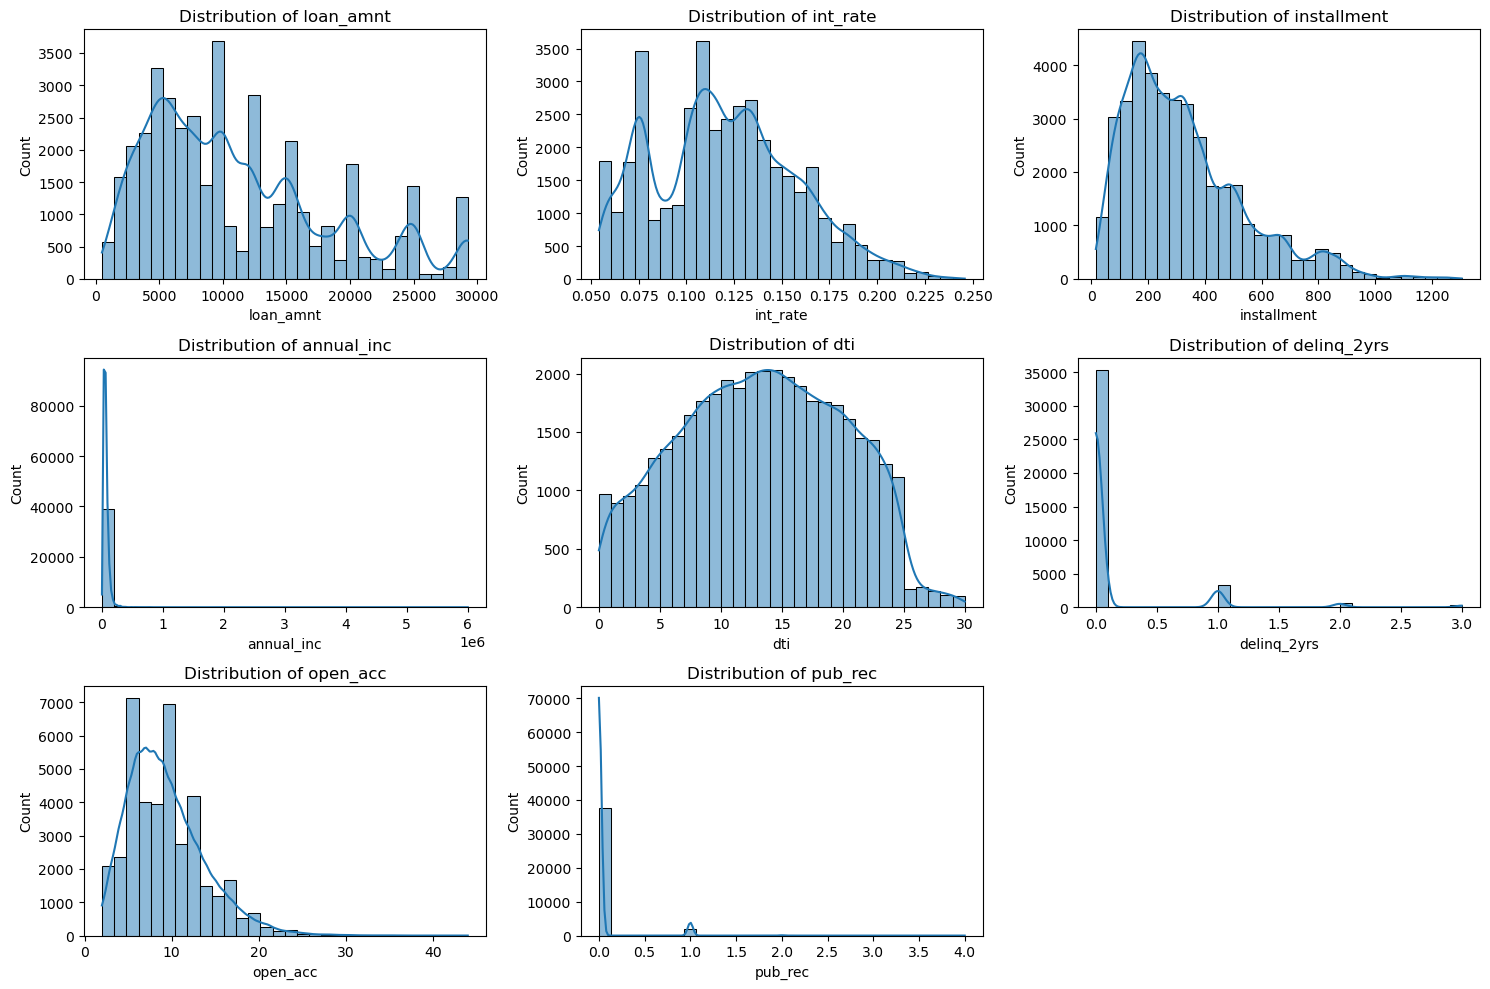

In [82]:
# Plot histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(loan_data_analysis[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout() # To display the labels without overlap
plt.show()

In [83]:
loan_data_analysis.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
annual_inc             float64
dti                    float64
delinq_2yrs              int64
open_acc                 int64
pub_rec                  int64
loan_status             object
home_ownership          object
emp_length              object
purpose                 object
verification_status     object
inq_last_6mths           int64
dtype: object

In [85]:
# List of categorical columns
categorical_cols = [
    'grade', 'home_ownership', 'loan_status', 'purpose', 'verification_status', 'emp_length'
]

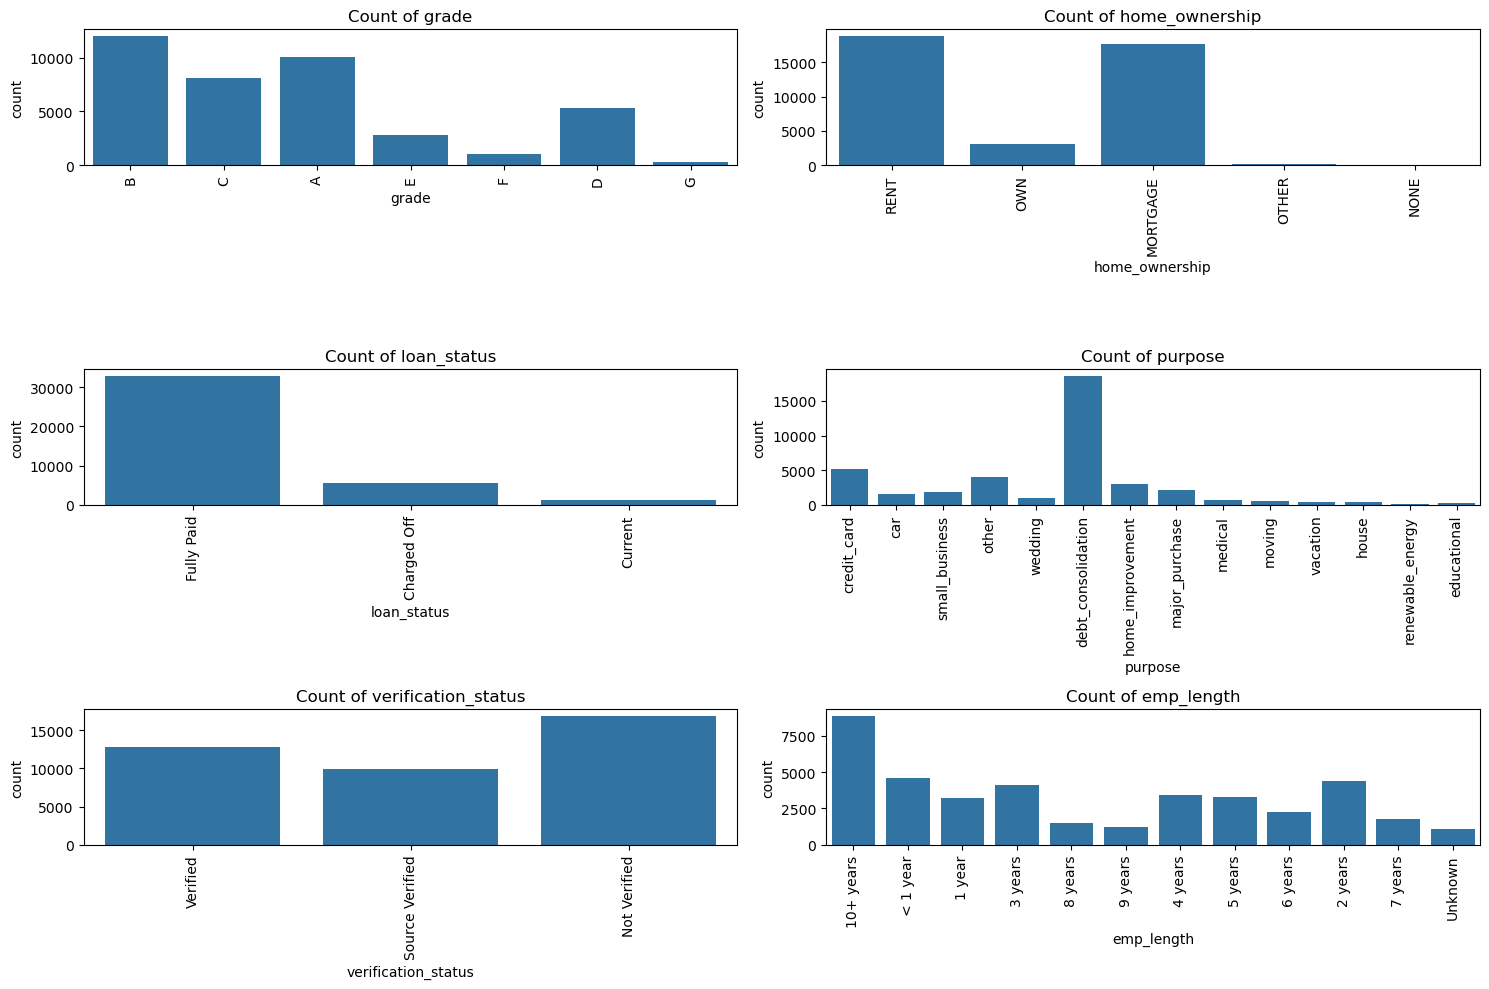

In [87]:
# Plot bar plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=loan_data_analysis, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

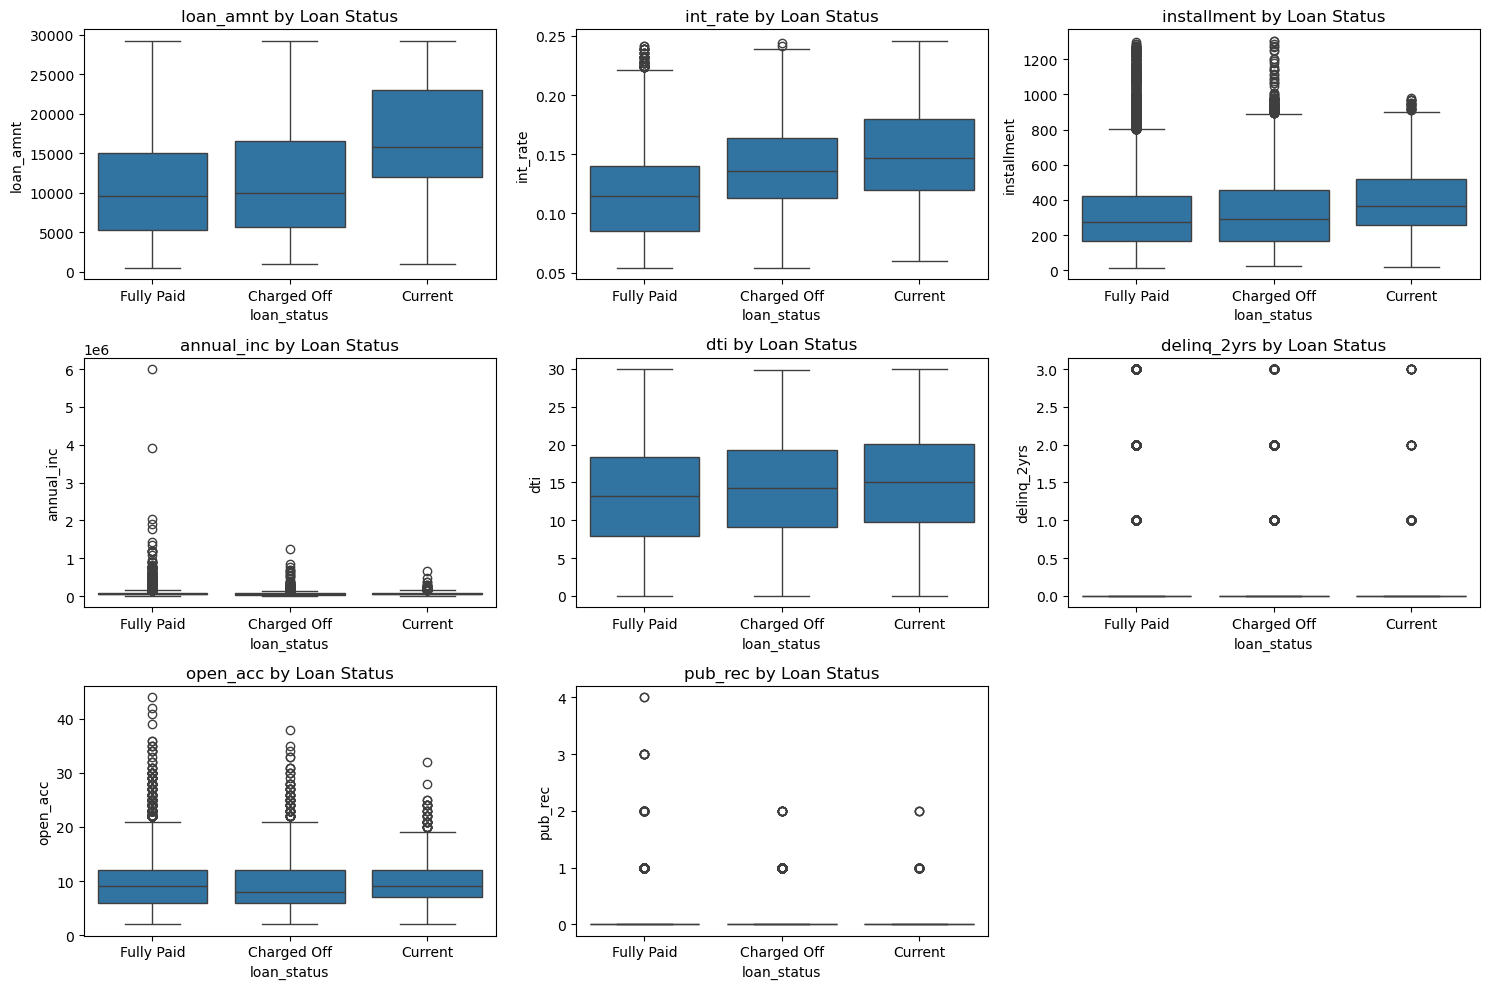

In [88]:
# Box plots for numerical variables segmented by loan_status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=loan_data_analysis, x='loan_status', y=col)
    plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()

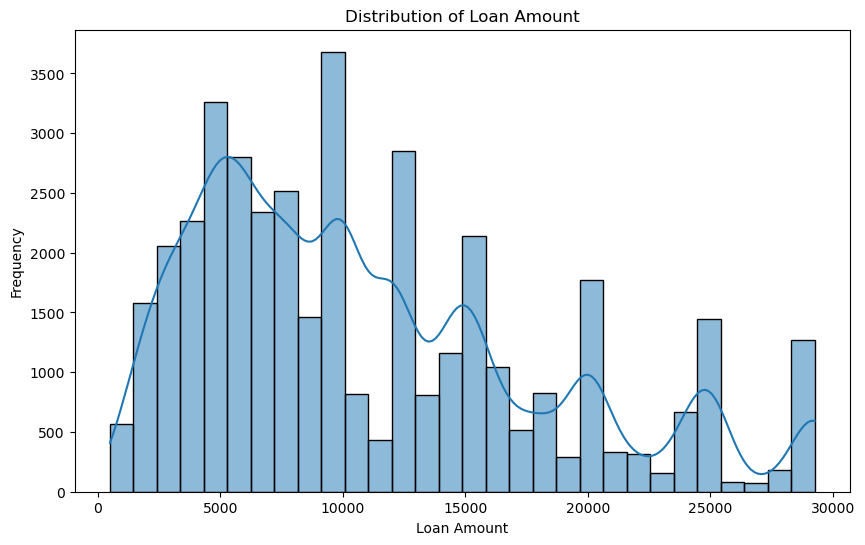

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(loan_data_analysis['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='int_rate', ylabel='Density'>

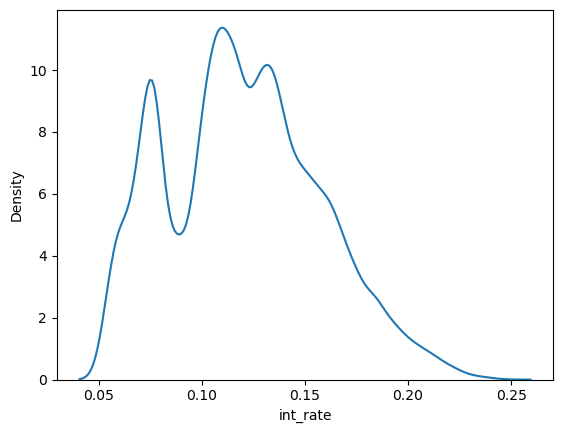

In [102]:
sns.kdeplot(loan_data_analysis['int_rate'])

In [106]:
# Check the unique categories in 'purpose'
loan_data_analysis['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\2137784233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data_analysis, x='purpose', order=loan_data_analysis['purpose'].value_counts().index, palette='viridis')


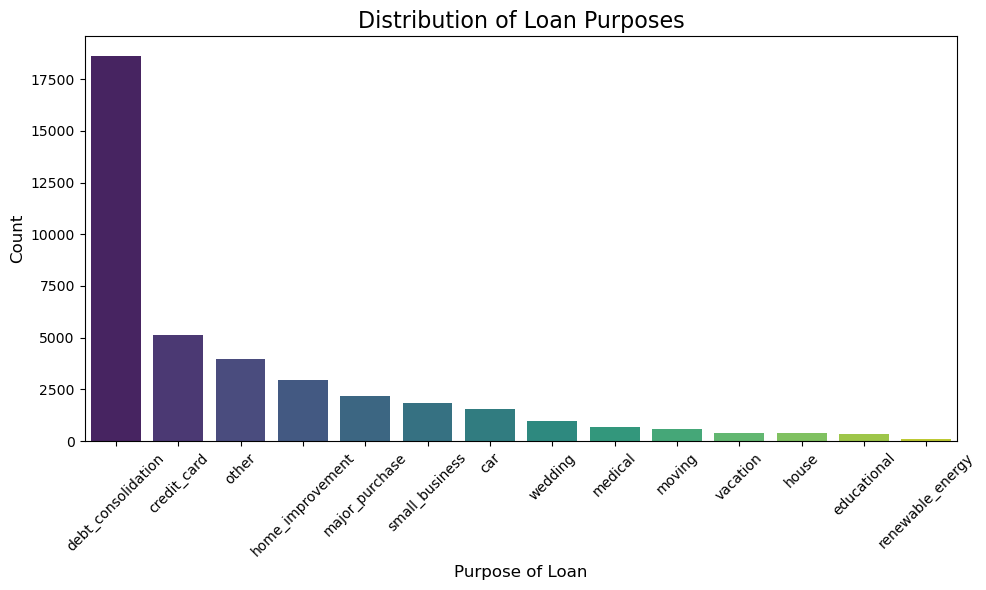

In [107]:
plt.figure(figsize=(10, 6))

# Plot the distribution of 'purpose'
sns.countplot(data=loan_data_analysis, x='purpose', order=loan_data_analysis['purpose'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Distribution of Loan Purposes', fontsize=16)
plt.xlabel('Purpose of Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

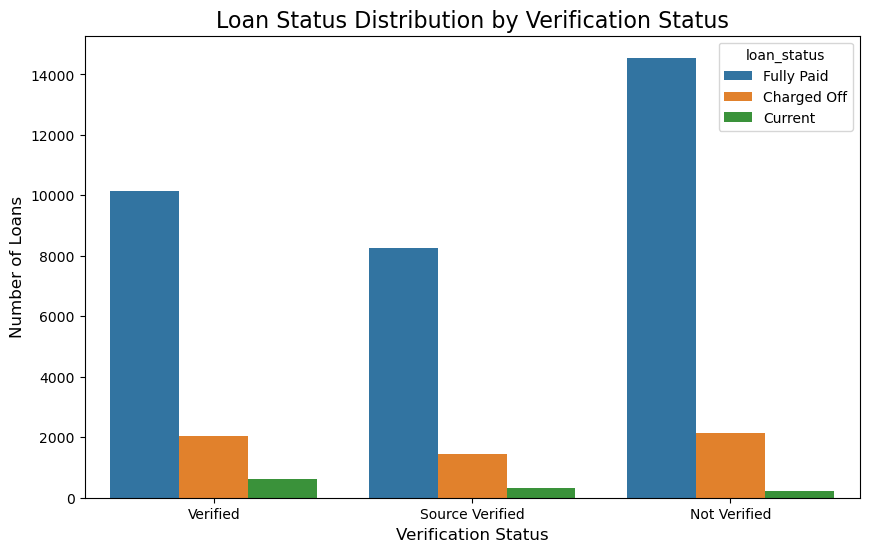

In [109]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a countplot for verification_status with loan_status as hue
sns.countplot(data=loan_data, x='verification_status', hue='loan_status')

# Set title and labels
plt.title('Loan Status Distribution by Verification Status', fontsize=16)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)

# Display the plot
plt.show()

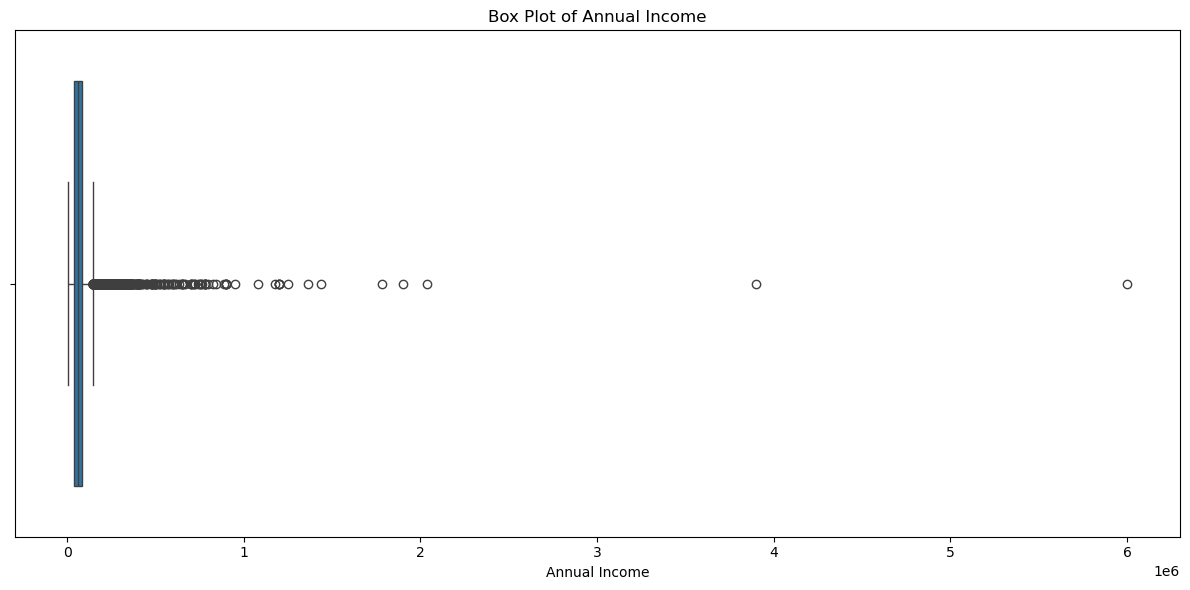

In [117]:
# Visualize Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_analysis, x='annual_inc')
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.tight_layout()
plt.show()


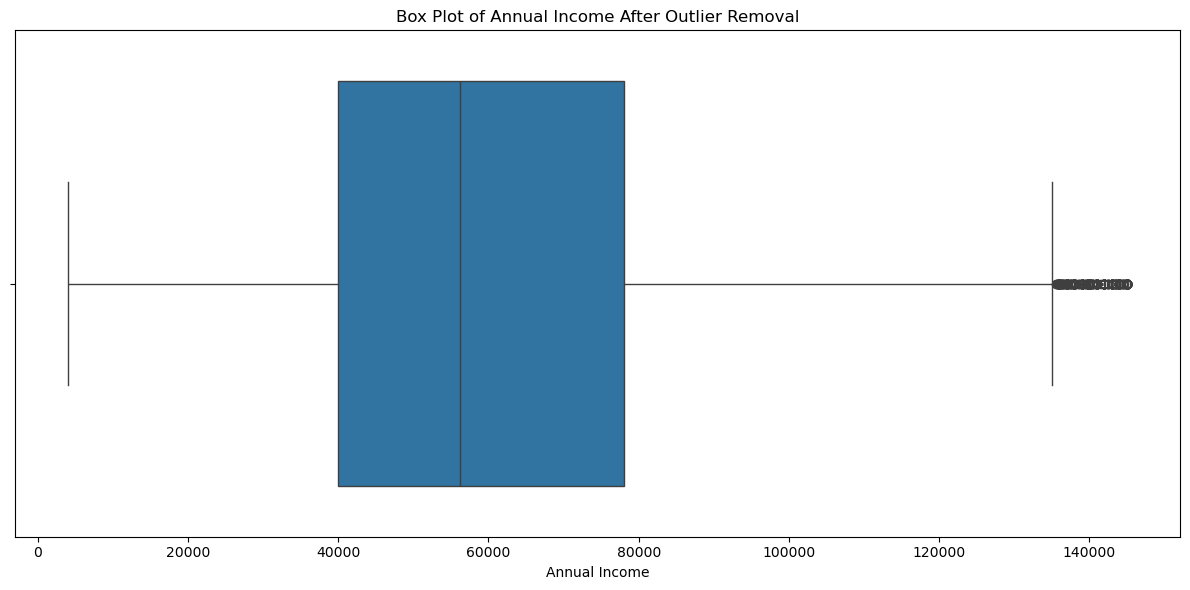

In [120]:
# Identify Outliers using IQR
Q1 = loan_data_analysis['annual_inc'].quantile(0.25)
Q3 = loan_data_analysis['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handle Outliers
loan_data_analysis['annual_inc'] = loan_data_analysis['annual_inc'].clip(lower=lower_bound, upper=upper_bound)

# Step 4: Replot to see the effect of outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_analysis, x='annual_inc')
plt.title('Box Plot of Annual Income After Outlier Removal')
plt.xlabel('Annual Income')
plt.tight_layout()
plt.show()

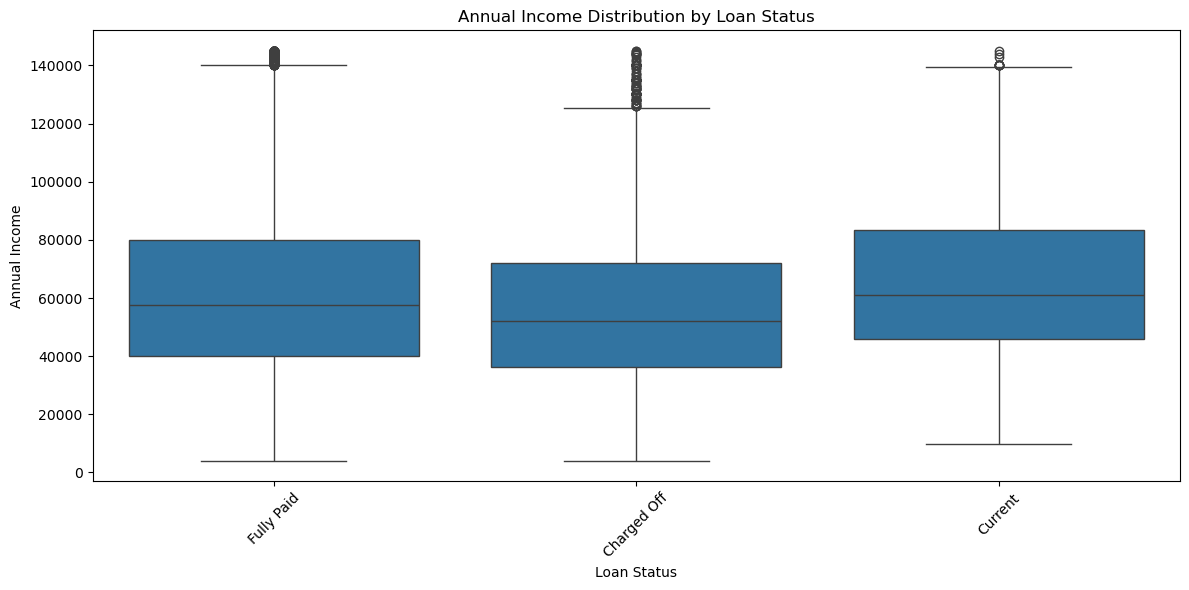

In [122]:
# Creating income ranges
loan_data_analysis['income_range'] = pd.cut(loan_data_analysis['annual_inc'], 
                                    bins=[0, 30000, 60000, 90000, 120000, float('inf')],
                                    labels=['<30K', '30K-60K', '60K-90K', '90K-120K', '120K+'])

# Create a box plot to analyze Annual Income by Loan Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_analysis, x='loan_status', y='annual_inc')
plt.title('Annual Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\91812\AppData\Local\Temp\ipykernel_26804\1161983826.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_income_by_purpose, x='annual_inc', y='purpose', palette='viridis')


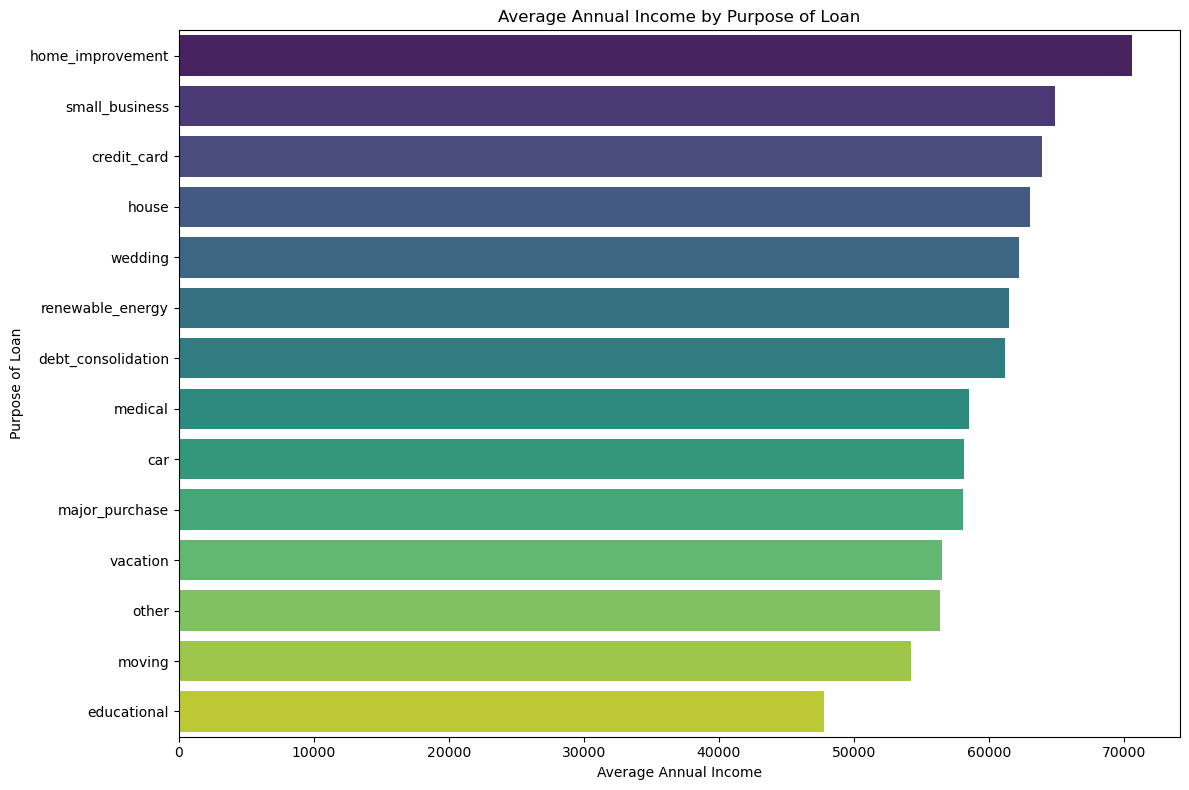

In [123]:
# Group Data by Purpose of Loan
average_income_by_purpose = loan_data_analysis.groupby('purpose')['annual_inc'].mean().reset_index()

# Sort the DataFrame by Average Income
average_income_by_purpose.sort_values(by='annual_inc', ascending=False, inplace=True)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=average_income_by_purpose, x='annual_inc', y='purpose', palette='viridis')
plt.title('Average Annual Income by Purpose of Loan')
plt.xlabel('Average Annual Income')
plt.ylabel('Purpose of Loan')
plt.tight_layout()
plt.show()

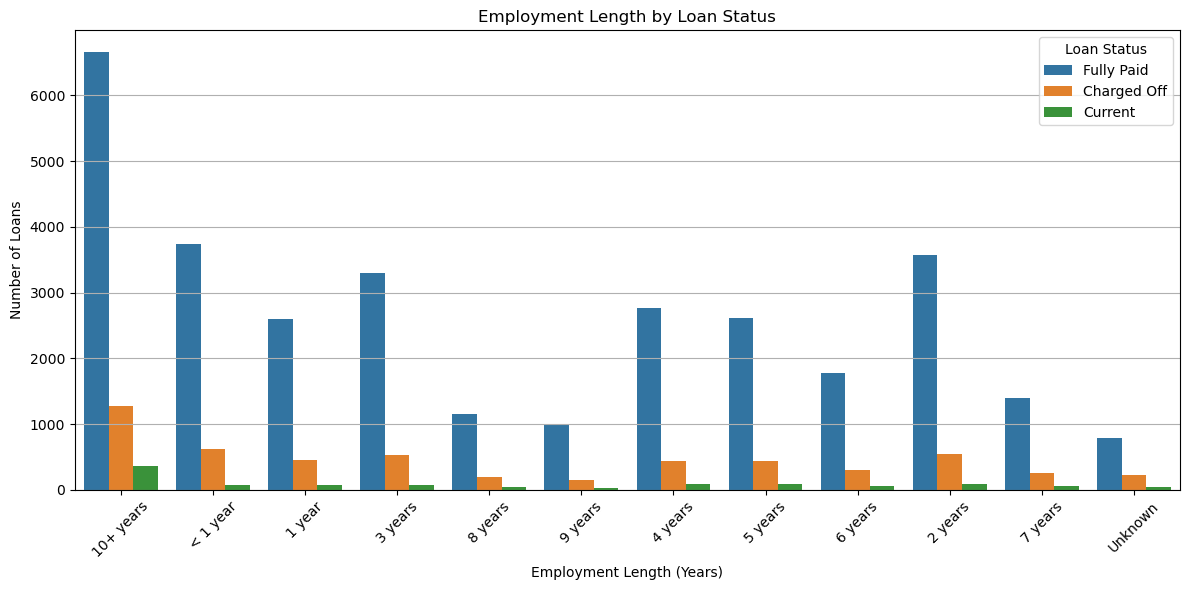

In [125]:
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', hue='loan_status', data=loan_data_analysis)
plt.title('Employment Length by Loan Status')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

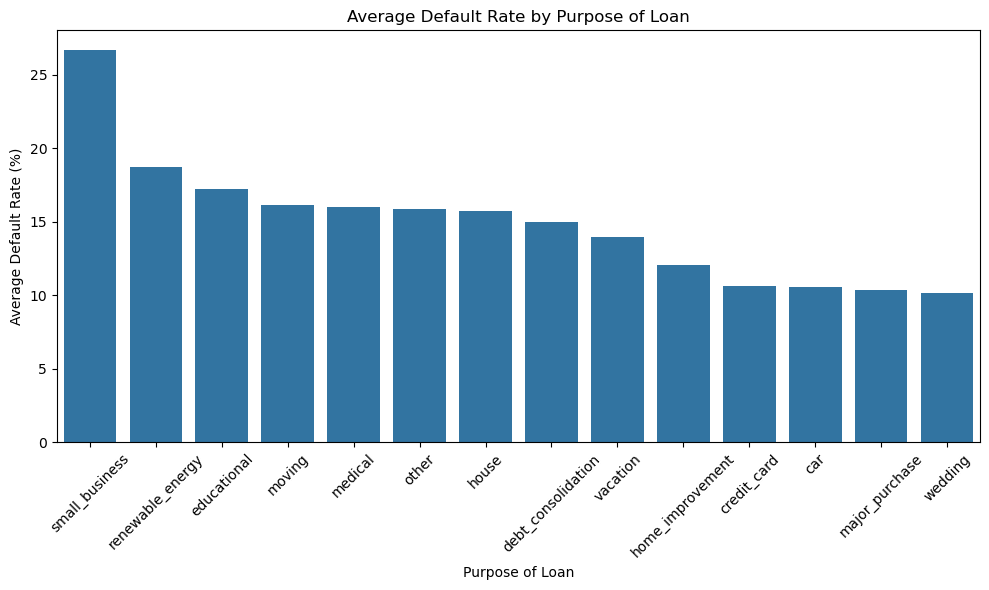

In [130]:
# Create a DataFrame for default rates by purpose of loan
default_rate_by_purpose = loan_data_analysis.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the default rate (where loan_status is 'Charged Off')
default_rate_by_purpose['default_rate'] = default_rate_by_purpose['Charged Off'] * 100

# Sort by default rate
default_rate_by_purpose = default_rate_by_purpose.sort_values('default_rate', ascending=False)

# Plotting the default rates
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_purpose.index, y='default_rate', data=default_rate_by_purpose)
plt.title('Average Default Rate by Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Average Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

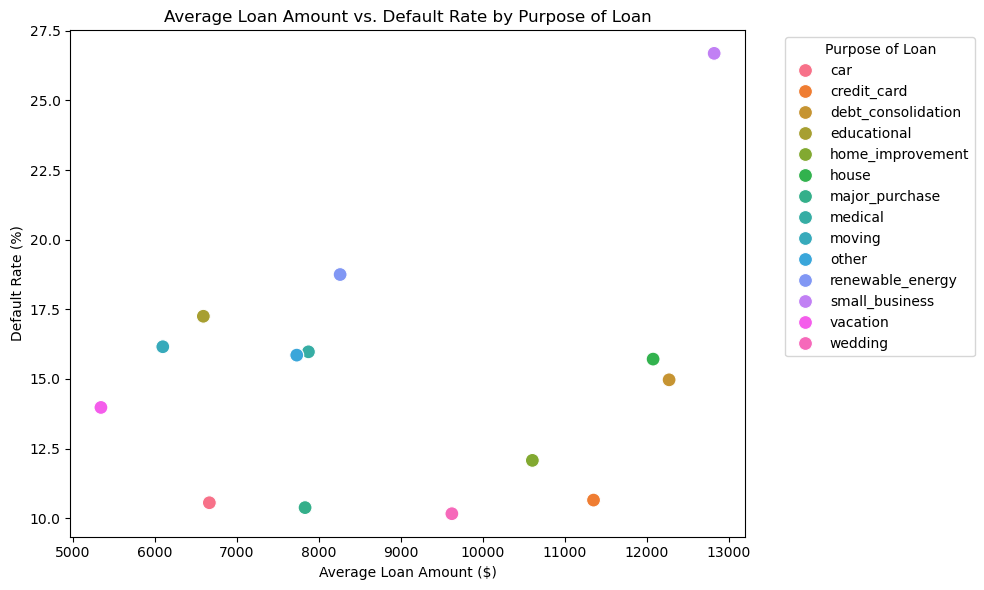

In [132]:
# Calculate the default rate and average loan amount by purpose of loan
default_rate_by_purpose = loan_data_analysis.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
default_rate_by_purpose['default_rate'] = default_rate_by_purpose['Charged Off'] * 100

# Calculate average loan amount by purpose
average_loan_amount = loan_data_analysis.groupby('purpose')['loan_amnt'].mean()

# Combine the two metrics into a single DataFrame
bivariate_data = pd.DataFrame({
    'default_rate': default_rate_by_purpose['default_rate'],
    'average_loan_amount': average_loan_amount
}).reset_index()

# Plotting the relationship between average loan amount and default rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bivariate_data, x='average_loan_amount', y='default_rate', hue='purpose', s=100)
plt.title('Average Loan Amount vs. Default Rate by Purpose of Loan')
plt.xlabel('Average Loan Amount ($)')
plt.ylabel('Default Rate (%)')
plt.legend(title='Purpose of Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

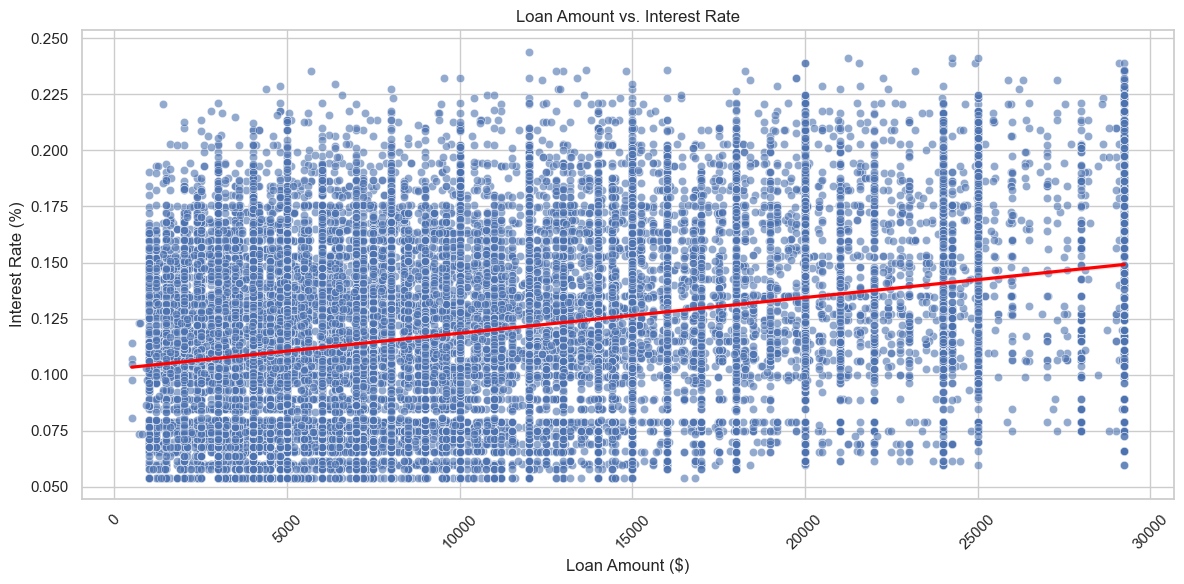

In [134]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between loan amount and interest rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=loan_data_analysis, x='loan_amnt', y='int_rate', alpha=0.6)

# Adding a regression line for better insight
sns.regplot(data=loan_data_analysis, x='loan_amnt', y='int_rate', scatter=False, color='red')

plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_26804\4218595380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_data_analysis, x='purpose', y='int_rate', palette='Set2')


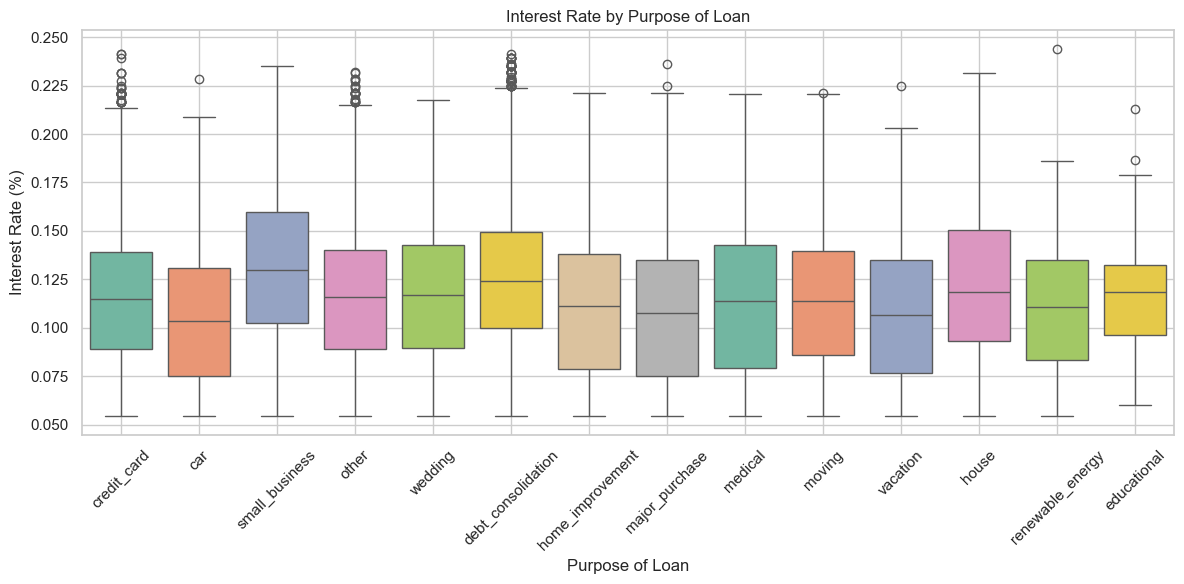

In [139]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot to visualize interest rate across different purposes
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_analysis, x='purpose', y='int_rate', palette='Set2')
plt.title('Interest Rate by Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


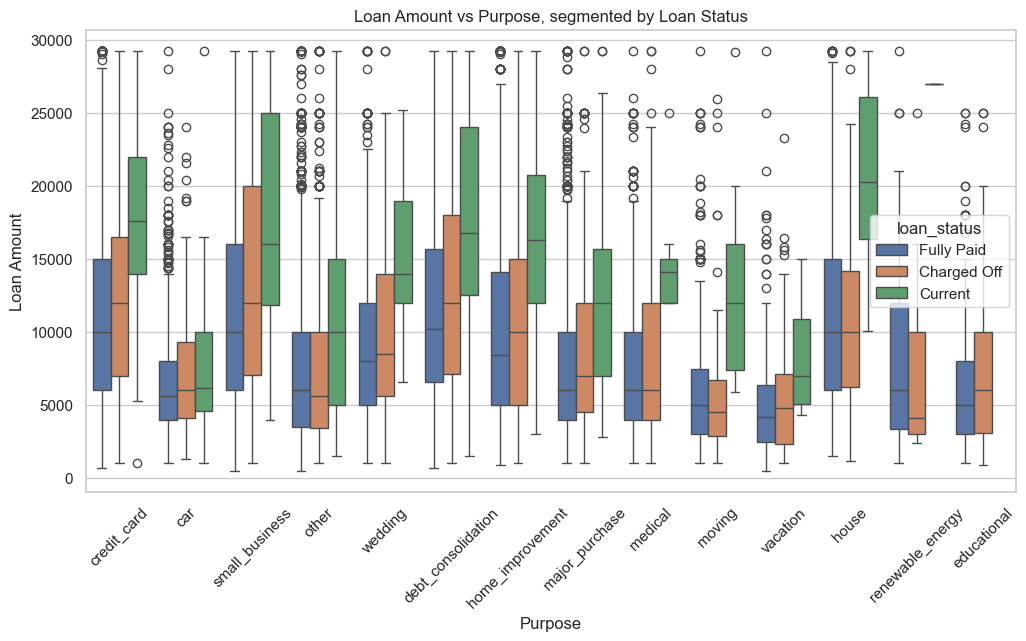

In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=loan_data_analysis)
plt.title('Loan Amount vs Purpose, segmented by Loan Status')
plt.xticks(rotation=45)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.show()

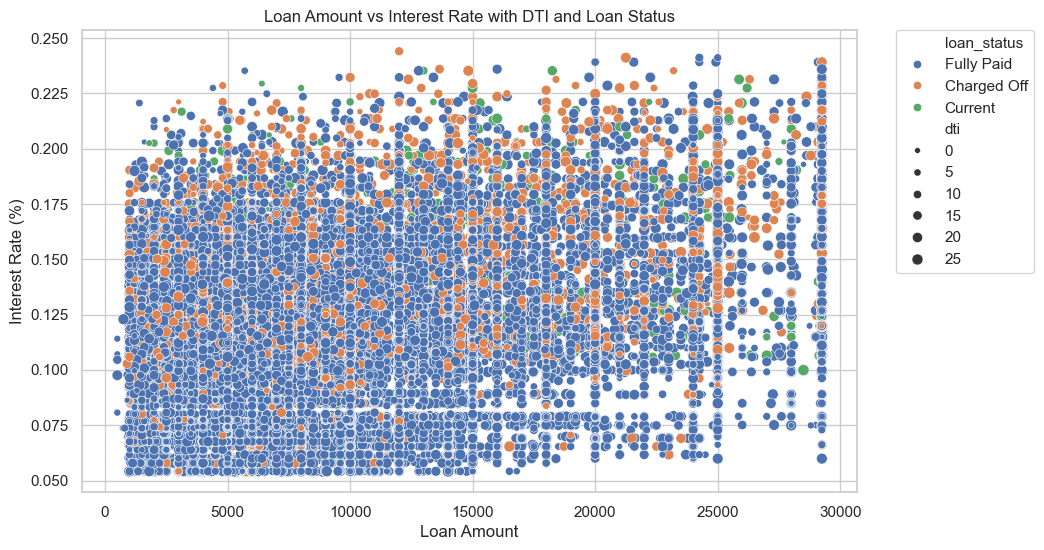

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', size='dti', hue='loan_status', data=loan_data_analysis)
plt.title('Loan Amount vs Interest Rate with DTI and Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()